## Wikipedia

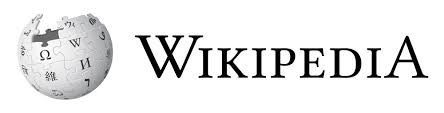

Wikipedia is a treasure trove of information, not just for unstructured data, but also structured data in the form of "infoboxes".

Various projects are working to extract this structured data, including

* [Yago demo](https://gate.d5.mpi-inf.mpg.de/webyago3spotlx/Browser)
* Dbpedia ([Bubble Navigator](http://147.228.127.146:9220/search/_all?query=%22cork%22), [Spotlight](http://demo.dbpedia-spotlight.org/))
* [Dbpedia as Tables](http://web.informatik.uni-mannheim.de/DBpediaAsTables/DBpedia-en-2016-04/DBpediaClasses.htm)
* [WikiData](https://www.wikidata.org/wiki/Wikidata:Introduction)

## DbPedia as Tables

In [1]:
from io import BytesIO
import urllib.request
import gzip
import json
from itertools import islice
import re

import pandas as pd


def get_tables(url):
    """
    download table, parse json data and return 'instances' list
    """
    buffer = BytesIO(urllib.request.urlopen(url).read())
    with gzip.open(buffer, 'r') as fhandle:
        return json.loads(fhandle.read())['instances']

    
def remove_nulls(elt):
    """
    remove null values/ tuples from data
    """
    if isinstance(elt, list):
        return [remove_nulls(x) for x in elt]
    elif isinstance(elt, dict):
        return {k: remove_nulls(v) for k, v in elt.items()
                if v != 'NULL'}
    else:
        return elt

## DbPedia Universities

In [2]:
BASE_URL = 'http://web.informatik.uni-mannheim.de/DBpediaAsTables/DBpedia-en-2016-04/json/'
UNI_URL = BASE_URL + 'University.json.gz'
    
universities = remove_nulls(get_tables(UNI_URL))

In [3]:
len(universities)

19777

In [4]:
import re

shorter = re.compile(r'https?://dbpedia.org/[^/]+/')

def readable(elt):
    """
    remove fully qualifed dbpedia prefix for easier readability
    """
    if isinstance(elt, list):
        return [readable(x) for x in elt]
    elif isinstance(elt, dict):
        return {readable(k): readable(v) for k, v in elt.items()}
    elif isinstance(elt, str):
        return shorter.sub('', elt)
    else:
        return elt


query = 'University.College.Cork'
for uni in universities:
    rex = re.compile(query, flags=re.I)
    if any(rex.search(k) for k in uni.keys()):
        print(json.dumps(readable(uni), indent=4))

{
    "University_College_Cork": {
        "http://www.w3.org/2000/01/rdf-schema#label": "University College Cork",
        "president_label": "Michael Murphy (academic)",
        "country": "Republic_of_Ireland",
        "http://www.w3.org/2003/01/geo/wgs84_pos#lat": "51.893",
        "motto": "Where Finbarr Taught Let Munster Learn",
        "city": "Cork_(city)",
        "http://www.w3.org/1999/02/22-rdf-syntax-ns#type_label": [
            "owl#Thing",
            "organisation",
            "university",
            "educational institution",
            "agent",
            "DUL.owl#Agent",
            "Organization",
            "DUL.owl#SocialPerson",
            "Q43229",
            "CollegeOrUniversity",
            "Q3918",
            "EducationalOrganization",
            "wgs84_pos#SpatialThing"
        ],
        "country_label": "Republic of Ireland",
        "http://www.w3.org/2003/01/geo/wgs84_pos#long": "-8.493",
        "http://www.w3.org/1999/02/22-rdf-syntax-ns#t

## DbPedia Companies

In [5]:
COMPANY_URL = BASE_URL + 'Company.json.gz'
companies = remove_nulls(get_tables(COMPANY_URL))

In [6]:
len(companies)

67544

In [7]:
query = 'EMC_Corporation'
for company in companies:
    rex = re.compile(query)
    if any(rex.search(k) for k in company.keys()):
        print(json.dumps(readable(company), indent=4))
        break

{
    "EMC_Corporation": {
        "subsidiary_label": [
            "RSA Security",
            "VMware",
            "LenovoEMC"
        ],
        "numberOfEmployees": "50000",
        "product_label": "EMC Corporation",
        "locationCity": [
            "Hopkinton,_Massachusetts",
            "Massachusetts"
        ],
        "locationCity_label": [
            "Hopkinton Massachusetts",
            "Massachusetts"
        ],
        "type": "Public_company",
        "industry": "Computer_data_storage",
        "keyPerson": [
            "Joseph_M._Tucci",
            "President",
            "Chief_executive_officer",
            "Chairman"
        ],
        "revenue": "2.444E10",
        "keyPerson_label": [
            "Joseph M. Tucci",
            "President",
            "Chief executive officer",
            "Chairman"
        ],
        "http://www.w3.org/2000/01/rdf-schema#label": "EMC Corporation",
        "type_label": "Public company",
        "foundingYear": "197